# Data card
This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location.

At our system each order is assigned to a unique customer_id. This means that the same customer will get different ids for different orders. The purpose of having a customer_unique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.

boleto(Payment_type) It is a push payment, which relies on the consumer to initiate the payment, similar to using a bank wire. When your customer is ready to pay the Boleto, they can take it to any location that processes this payment method, or they can have it processed online.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
orders = pd.read_csv("olist_orders_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
category_translation = pd.read_csv("product_category_name_translation.csv")

In [65]:
print(orders.info())
print()
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non

In [66]:
orders['order_id'].nunique()

99441

In [67]:
orders['order_status'].value_counts(dropna= False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [68]:
# Take only the ones where status equals 'delivered.
orders_df = orders[orders['order_status'] == 'delivered']
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [69]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [70]:
# Merge oreders and customers data
orders_customers_df = orders_df.merge(customers, on='customer_id')

In [71]:
orders_customers_df.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
dtype: int64

In [72]:
orders_customers_df[orders_customers_df['order_approved_at'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5171,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00,8a9a08c7ca8900a200d83cf838a07e0b,6708,cotia,SP
16098,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00,91efb7fcabc17925099dced52435837f,93548,novo hamburgo,RS
18494,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00,e1f01a1bd6485e58ad3c769a5427d8a8,8230,sao paulo,SP
21999,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00,7e1a5ca61b572d76b64b6688b9f96473,62700,caninde,CE
22478,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00,c8822fce1d0bfa7ddf0da24fff947172,27945,macae,RJ
26014,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00,6ff8b0d7b35d5c945633b8d60165691b,11030,santos,SP
37158,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00,2e0a2166aa23da2472c6a60c4af6f7a6,3573,sao paulo,SP
38171,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00,c4c0011e639bdbcf26059ddc38bd3c18,13225,varzea paulista,SP
46957,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00,d49f3dae6bad25d05160fc17aca5942d,36400,conselheiro lafaiete,MG
59912,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00,5a4fa4919cbf2b049e72be460a380e5b,35620,abaete,MG


The data has some empty values in the 'order_approved_at' column. It looks like the orders were delivered. Later, we can check the sellers for those orders if needed.

We can also check the empty values in the 'order_delivered_customer_date' column later and look into the seller as well if needed.

In [73]:
columns = ['customer_zip_code_prefix','customer_city','order_approved_at','order_status']
orders_customers_df = orders_customers_df.drop(columns, axis=1)

In [74]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [75]:
payments['order_id'].nunique()

99440

In [76]:
# Aggregate the payments table by the 'order_id' column.
payments = payments.groupby('order_id').agg({
    'payment_type': lambda x: ', '.join(sorted(set(x))),  # Join unique payment methods into a string
    'payment_value': 'sum',  # Total order value
    'payment_installments': 'max',
    'payment_sequential' : 'sum'
}).reset_index()

In [77]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99440 entries, 0 to 99439
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              99440 non-null  object 
 1   payment_type          99440 non-null  object 
 2   payment_value         99440 non-null  float64
 3   payment_installments  99440 non-null  int64  
 4   payment_sequential    99440 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB


In [78]:
# Merge the order_customer dataset with the payment dataset.
order_customer_payment = orders_customers_df.merge(payments, on='order_id')

In [79]:
order_customer_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96477 entries, 0 to 96476
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96477 non-null  object 
 1   customer_id                    96477 non-null  object 
 2   order_purchase_timestamp       96477 non-null  object 
 3   order_delivered_carrier_date   96475 non-null  object 
 4   order_delivered_customer_date  96469 non-null  object 
 5   order_estimated_delivery_date  96477 non-null  object 
 6   customer_unique_id             96477 non-null  object 
 7   customer_state                 96477 non-null  object 
 8   payment_type                   96477 non-null  object 
 9   payment_value                  96477 non-null  float64
 10  payment_installments           96477 non-null  int64  
 11  payment_sequential             96477 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usag

In [80]:
order_customer_payment['order_id'].nunique()

96477

# Delivery Time Exploraiton

In [81]:
# Take the data that does not have any empty values.
mask = order_customer_payment[['order_delivered_customer_date', 'order_delivered_carrier_date']].notna().all(axis=1)
order_customer_payment = order_customer_payment[mask]
order_customer_payment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96468 entries, 0 to 96476
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96468 non-null  object 
 1   customer_id                    96468 non-null  object 
 2   order_purchase_timestamp       96468 non-null  object 
 3   order_delivered_carrier_date   96468 non-null  object 
 4   order_delivered_customer_date  96468 non-null  object 
 5   order_estimated_delivery_date  96468 non-null  object 
 6   customer_unique_id             96468 non-null  object 
 7   customer_state                 96468 non-null  object 
 8   payment_type                   96468 non-null  object 
 9   payment_value                  96468 non-null  float64
 10  payment_installments           96468 non-null  int64  
 11  payment_sequential             96468 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 9.

In [82]:
# Convert the date columns to the date type.
date_columns = ['order_purchase_timestamp','order_delivered_carrier_date',
                'order_delivered_customer_date','order_estimated_delivery_date']
order_customer_payment = order_customer_payment.copy()
order_customer_payment[date_columns] = order_customer_payment[date_columns].apply(pd.to_datetime)

In [83]:
# Create a delivery_days column to calculate the number of days the delivery took after the customer purchased the product.
order_customer_payment['delivery_days'] = (
    order_customer_payment['order_delivered_customer_date'] - order_customer_payment['order_purchase_timestamp']
).dt.days

In [84]:
order_customer_payment['delivery_days'].describe()

count    96468.000000
mean        12.092756
std          9.549662
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_days, dtype: float64

In [85]:
# Check for the rows where delivery_days equals zero
order_customer_payment[order_customer_payment['delivery_days'] == 0]

,order_id,customer_id,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_state,payment_type,payment_value,payment_installments,payment_sequential,delivery_days
382,38c1e3d4ed6a13cd0cf612d4c09766e9,18c934f4cdc994cd04eb13bce3f47a18,2018-02-02 15:26:38,2018-02-03 01:18:26,2018-02-03 15:05:56,2018-02-20,9aa5b032a9157594cda43b16a832f738,SP,credit_card,188.94,2,1,0
712,d3ca7b82c922817b06e5ca21165c5ea2,d23df2c6c3e51d875f458d123b2b3c90,2017-11-16 13:54:08,2017-11-16 20:56:53,2017-11-17 13:49:40,2017-11-29,88fbad05557cbc2d2f5fee59d6966716,SP,credit_card,108.51,2,1,0
30588,1d893dd7ca5f77ebf5f59f0d2017eee0,b19da0df0271e8a3553e3670f86aeab5,2017-06-19 08:19:45,2017-06-19 13:32:04,2017-06-19 21:07:52,2017-06-30,adfcd54789b345d7242847c583b483cf,RJ,credit_card,355.20,5,1,0
36631,21a8ffca665bc7a1087d31751a7b7cbc,225aed9e773953084b09cf496c2be05a,2017-05-31 12:00:35,2017-05-31 12:43:47,2017-06-01 10:28:24,2017-06-13,92776276a13b6d52820b4014aa07250d,SP,"credit_card, voucher",58.62,1,3,0
37645,f3c6775ba3d2d9fe2826f93b71f12008,6aef84c09844a371d82a49152c550b95,2017-07-04 11:37:47,2017-07-04 13:53:13,2017-07-05 08:09:26,2017-07-17,c4320fbd4bc46bc041e8c2b703a05cd6,SP,credit_card,194.48,1,1,0
40560,434cecee7d1a65fc65358a632b6f725f,922a46283625e9c096bfd998913c470c,2017-05-29 13:21:46,2017-05-29 14:54:51,2017-05-30 08:06:56,2017-06-19,781f80ac54444e4020dc3f70f044d8b3,SP,credit_card,62.76,2,1,0
47315,f349cdb62f69c3fae5c4d7d3f3a4a185,c5e200d485ae35a7036cc2e7c1d8ea81,2018-06-28 14:34:48,2018-06-28 18:08:00,2018-06-29 14:12:18,2018-07-12,938e4b10f5b5ca81ab31b7c89367c559,SP,credit_card,78.64,1,1,0
47425,d5fbeedc85190ba88580d6f82d1d5ed3,344423c2e26d47d2b6d3dd363a89e812,2017-05-15 11:50:53,2017-05-15 12:52:34,2017-05-16 10:21:52,2017-05-24,6ebecf9718a9fdd2d34ea36f36501420,SP,credit_card,137.16,3,1,0
49551,e65f1eeee1f52024ad1dcd03447f7482,198f511b5a75bf936a96f1d4769e3974,2018-05-18 15:03:19,2018-05-18 15:00:00,2018-05-19 12:28:30,2018-05-29,d5f0cd2eb93b7fc7c2350e758af16dc9,SP,credit_card,43.28,1,1,0
67223,79e324907160caea526fd8b94389dbbc,331d79b67223ee7e5cd31d3e03e4cfcc,2018-06-18 12:59:42,2018-06-18 14:52:00,2018-06-19 12:43:27,2018-06-28,d18fee94d33d23af9211025b59299edd,SP,credit_card,25.29,2,1,0


Above where 'delivery_days' equals 0, the delivery time takes less than 1 day.

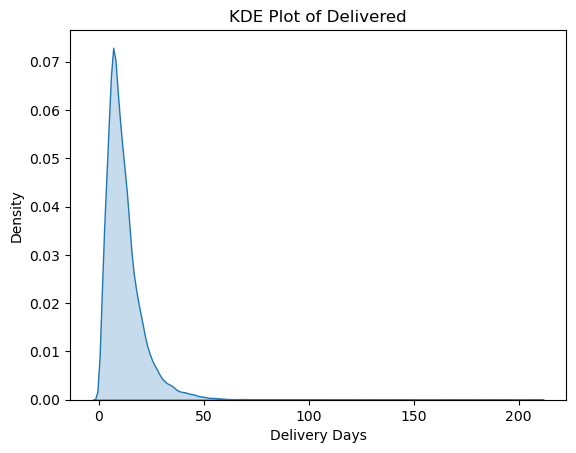

In [86]:
# Plot KDE
sns.kdeplot(order_customer_payment['delivery_days'], fill=True)
plt.xlabel('Delivery Days')
plt.ylabel('Density')
plt.title('KDE Plot of Delivered')
plt.show()

In [87]:
# Look for the outliers in the 'delivery_days' column
Q1 = order_customer_payment['delivery_days'].quantile(0.25)
Q3 = order_customer_payment['delivery_days'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
outliers = order_customer_payment[order_customer_payment['delivery_days']> upper_bound]

print(f"Upperbound: {int(upper_bound)} days")
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers)/len(order_customer_payment)*100:.2f}%")

Upperbound: 28 days
Number of outliers: 5020
Percentage of outliers: 5.20%


Where 'delivery_days' is more than 28, it is considered an outlier.

5.20% of the delivered orders take longer than the rest of the data.


In [88]:
percentiles = order_customer_payment['delivery_days'].describe(percentiles=[0.90, 0.95, 0.98])

In [89]:
percentiles

count    96468.000000
mean        12.092756
std          9.549662
min          0.000000
50%         10.000000
90%         23.000000
95%         29.000000
98%         38.000000
max        209.000000
Name: delivery_days, dtype: float64

In [90]:
# Calculate the estimated delivery days from the order purchase timestamp.
order_customer_payment['estimated_days'] = (
    order_customer_payment['order_estimated_delivery_date'] - order_customer_payment['order_purchase_timestamp']
).dt.days                                           

In [91]:
order_customer_payment['estimated_days'].describe()

count    96468.000000
mean        23.372580
std          8.758218
min          2.000000
25%         18.000000
50%         23.000000
75%         28.000000
max        155.000000
Name: estimated_days, dtype: float64

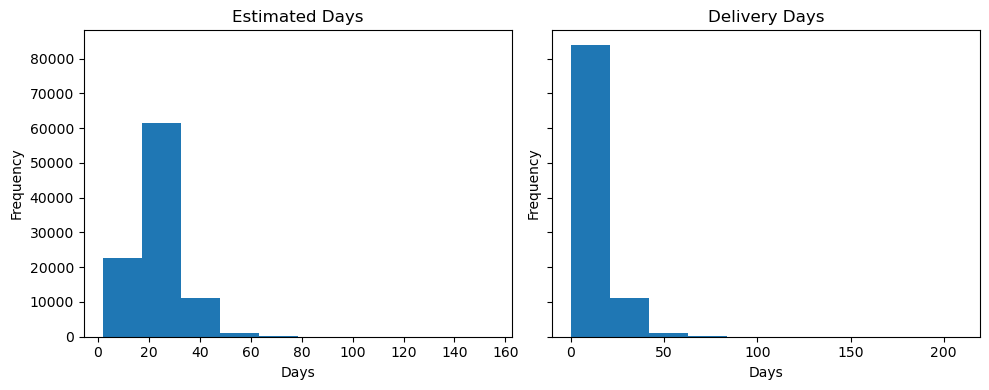

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)
axes[0].hist(order_customer_payment['estimated_days'])
axes[0].set_title('Estimated Days')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Frequency')

axes[1].hist(order_customer_payment['delivery_days'])
axes[1].set_title('Delivery Days')
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Frequency')

plt.tight_layout() 
plt.show()

Actual deliveries (right plot) tend to be faster than estimated times (left plot).
The delivery system appears to be efficient as most deliveries are completed in the first time bucket.
There's less spread in actual delivery times compared to estimated times.

In [93]:
# Calculate the difference between the estimated delivery date and the actual delivery date.
order_customer_payment['estimated_vs_actual_diff'] = (
    order_customer_payment['order_estimated_delivery_date'] - order_customer_payment['order_delivered_customer_date']
).dt.days

In [94]:
order_customer_payment['estimated_vs_actual_diff'].describe()

count    96468.000000
mean        10.876570
std         10.180881
min       -189.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        146.000000
Name: estimated_vs_actual_diff, dtype: float64

In [95]:
late_delivery = order_customer_payment[order_customer_payment['estimated_vs_actual_diff'] < 0]
print(f"Orders delivered after the estimated delivery date:\n{late_delivery['estimated_vs_actual_diff'].describe()}")
print(f'Percentage of late deliveries: {len(late_delivery) / len(order_customer_payment):.2%}')

Orders delivered after the estimated delivery date:
count    7824.000000
mean       -9.863753
std        13.948659
min      -189.000000
25%       -12.000000
50%        -6.000000
75%        -2.000000
max        -1.000000
Name: estimated_vs_actual_diff, dtype: float64
Percentage of late deliveries: 8.11%


8.11% of the total delivered orders were delivered after the estimated delivery date.

In [96]:
early_delivery = order_customer_payment[order_customer_payment['estimated_vs_actual_diff'] >= 0]
print(f"Orders delivered before the estimated delivery date:\n{early_delivery['estimated_vs_actual_diff'].describe()}")
print(f'Percentage of early deliveries: {len(early_delivery) / len(order_customer_payment):.2%}')

Orders delivered before the estimated delivery date:
count    88644.000000
mean        12.707177
std          7.369468
min          0.000000
25%          7.000000
50%         12.000000
75%         17.000000
max        146.000000
Name: estimated_vs_actual_diff, dtype: float64
Percentage of early deliveries: 91.89%


When orders are early, they're typically delivered about 12.70 days before the estimated date
When orders are late, they're typically about 9.86 days past the estimated date.

This bias in the estimated delivery days (91.89% of orders are delivered early) could be intentional and systematic to ensure customer satisfaction.

# Product-Items-Sellers-Translations Datasets

In [97]:
# Use the category_translation dataset to extract the English-translated names.
products = products.merge(category_translation, on='product_category_name', how='left')

In [98]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


It looks like some categories have not been translated into English. 

In [99]:
# Check the rows where 'product_category_name' has values, but 'product_category_name_english' does not.
empty_english = products[(products['product_category_name_english'].isnull()) & (products['product_category_name'].notnull())]

In [100]:
empty_english['product_category_name'].value_counts(dropna=False)

product_category_name
portateis_cozinha_e_preparadores_de_alimentos    10
pc_gamer                                          3
Name: count, dtype: int64

In [101]:
# Empty rows in the 'product_category_name_english' column are filled with the original row name.
products['product_category_name_english'] = products['product_category_name_english'].fillna(products['product_category_name'])

In [102]:
# Check for rows that do not have an English translation and add it to the dataset.
products.loc[products['product_category_name_english'] == 'portateis_cozinha_e_preparadores_de_alimentos',
             'product_category_name_english'] = 'portable_kitchen_and_food_processors'

In [103]:
# Drop the 'product_category_name' column
products = products.drop('product_category_name', axis=1)

In [104]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [105]:
items['order_id'].nunique()

98666

In [106]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [107]:
# Merge the products and items datasets together.
items_products = items.merge(products, on='product_id', how= 'left')
items_products_sellers = items_products.merge(sellers, on='seller_id', how='left')

In [108]:
items_products_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_name_lenght            111047 non-null  float64
 8   product_description_lenght     111047 non-null  float64
 9   product_photos_qty             111047 non-null  float64
 10  product_weight_g               112632 non-null  float64
 11  product_length_cm              112632 non-null  float64
 12  product_height_cm             

In [109]:
items_products_sellers.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,87900,loanda,PR


In [110]:
columns_ = ['order_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_weight_g',
            'product_category_name_english','seller_state']

items_products_sellers = items_products_sellers[columns_]

In [111]:
# Group the dataset by 'seller_id' and count the number of transactions per seller.
seller_counts = items_products_sellers.groupby('seller_id').size()

#Sort the sellers in descending order to see the most active sellers first.
seller_counts.sort_values(ascending = False)

seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
5f57db27027655e6c6a391601daa0258       1
5e25c632f9db6cfb8bc100421c2737b6       1
5e106d93b717c2682b9383da480364a1       1
d36b07fd3c5088e477a72d1fccfe29d4       1
7d81e74a4755b552267cd5e081563028       1
Length: 3095, dtype: int64

In [112]:
seller_counts.describe(percentiles=[0.90, 0.95, 0.98])

count    3095.000000
mean       36.397415
std       119.193461
min         1.000000
50%         8.000000
90%        80.000000
95%       146.600000
98%       302.480000
max      2033.000000
dtype: float64

50% (median) of sellers sold 8 orders or less.
The high standard deviation (119.2) relative to the mean (36.4) indicates high variability in seller activity.

In [128]:
# Analyze the seller performance. 
seller_performance = items_products_sellers.groupby('seller_id').agg(
    total_revenue=('price', 'sum'),
    total_orders=('order_id', 'count'),
    avg_order_value=('price', 'mean')
)

In [129]:
seller_performance.head()

,total_revenue,total_orders,avg_order_value
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,2685.00,3,895.000000
001cca7ae9ae17fb1caed9dfb1094831,25080.03,239,104.937364
001e6ad469a905060d959994f1b41e4f,250.00,1,250.000000
002100f778ceb8431b7a1020ff7ab48f,1234.50,55,22.445455
003554e2dce176b5555353e4f3555ac8,120.00,1,120.000000


In [130]:
seller_performance['total_revenue'].describe()

count      3095.000000
mean       4391.484233
std       13921.997192
min           3.500000
25%         208.850000
50%         821.480000
75%        3280.830000
max      229472.630000
Name: total_revenue, dtype: float64

In [132]:
# Determine percentile thresholds for segmenting the 'total_revenue' column.
percentiles = seller_performance['total_revenue'].quantile([0.25, 0.5, 0.75, 0.9])

# Create a 'segment' column for segment analysis.
seller_performance = seller_performance.reset_index()  # This makes seller_id a column instead of index
seller_performance['segment'] = pd.cut(seller_performance['total_revenue'],
                                     bins=[-float('inf'), percentiles[0.25], percentiles[0.5], 
                                          percentiles[0.75], percentiles[0.9], float('inf')],
                                     labels=['Bottom', 'Lower Mid', 'Upper Mid', 'High', 'Top'])

In [123]:
seller_performance.head()

,seller_id,total_revenue,total_orders,avg_order_value,segment
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,3,895.000000,Upper Mid
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03,239,104.937364,Top
2,001e6ad469a905060d959994f1b41e4f,250.00,1,250.000000,Lower Mid
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,55,22.445455,Upper Mid
4,003554e2dce176b5555353e4f3555ac8,120.00,1,120.000000,Bottom


In [133]:
# Analyze metrics by segment
segment_analysis = seller_performance.groupby('segment', observed=True).agg({
    'total_revenue': ['count', 'mean', 'sum'],
    'total_orders': ['mean', 'sum'],
    'avg_order_value': 'mean'
})

In [134]:
segment_analysis

total_revenue                           total_orders         \
                  count          mean         sum         mean    sum   
segment                                                                 
Bottom              774    101.321912    78423.16     2.072351   1604   
Lower Mid           774    464.165879   359264.39     6.282946   4863   
Upper Mid           773   1701.642885  1315369.95    17.336352  13401   
High                464   5722.869483  2655411.44    53.310345  24736   
Top                 310  29623.144387  9183174.76   219.503226  68046   

          avg_order_value  
                     mean  
segment                    
Bottom          63.516350  
Lower Mid      131.189098  
Upper Mid      209.284770  
High           301.232697  
Top            301.532502

Top sellers (310) are handling 68,046 orders. The average about 219.5 orders per seller for top sellers. Their average revenue per seller is about $29,623.   

Their average order value is about $301.53.

The average order value is more consistent across segments. This means the difference between segments is in order counts, not in average order values.

In [ ]:
seller_performance

In [143]:
total_rev_per_segment = segment_analysis['total_revenue'].sum()
total_rev_per_segment

count    3.095000e+03
mean     3.761314e+04
sum      1.359164e+07
dtype: float64

In [145]:
# Calculate the percentage of total revenue for each segment.
segment_orders_percentage = (segment_analysis['total_revenue']['sum'] / (segment_analysis['total_revenue']['sum'].sum())) * 100
segment_orders_percentage

segment
Bottom        0.576995
Lower Mid     2.643274
Upper Mid     9.677784
High         19.537088
Top          67.564858
Name: sum, dtype: float64

80% of the total revenue comes from the high and top segments.

In [146]:
# Calculate the percentage of total orders for each segment.
segment_orders_percentage = (segment_analysis['total_orders']['sum'] / (segment_analysis['total_orders']['sum'].sum())) * 100
segment_orders_percentage

segment
Bottom        1.423879
Lower Mid     4.316911
Upper Mid    11.896138
High         21.958278
Top          60.404794
Name: sum, dtype: float64

In [147]:
# Add a new 'segment' column to the main dataset.
items_products_sellers = items_products_sellers.merge(seller_performance[['seller_id', 'segment']], 
              on='seller_id',
              how='left')

In [148]:
items_products_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   order_id                       112650 non-null  object  
 1   seller_id                      112650 non-null  object  
 2   shipping_limit_date            112650 non-null  object  
 3   price                          112650 non-null  float64 
 4   freight_value                  112650 non-null  float64 
 5   product_weight_g               112632 non-null  float64 
 6   product_category_name_english  111047 non-null  object  
 7   seller_state                   112650 non-null  object  
 8   segment                        112650 non-null  category
dtypes: category(1), float64(3), object(5)
memory usage: 7.0+ MB


In [149]:
# Merging two separately merged datasets into a final combined dataset
# Initially, multiple datasets were merged into two main datasets for analysis.
# Now, these two datasets are merged together to create a final unified dataset.
merged_df = order_customer_payment.merge(
    items_products_sellers,
    on='order_id',
    how='left')

In [150]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110185 entries, 0 to 110184
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110185 non-null  object        
 1   customer_id                    110185 non-null  object        
 2   order_purchase_timestamp       110185 non-null  datetime64[ns]
 3   order_delivered_carrier_date   110185 non-null  datetime64[ns]
 4   order_delivered_customer_date  110185 non-null  datetime64[ns]
 5   order_estimated_delivery_date  110185 non-null  datetime64[ns]
 6   customer_unique_id             110185 non-null  object        
 7   customer_state                 110185 non-null  object        
 8   payment_type                   110185 non-null  object        
 9   payment_value                  110185 non-null  float64       
 10  payment_installments           110185 non-null  int64         
 11  

In [151]:
merged_df.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id', 'customer_state',
       'payment_type', 'payment_value', 'payment_installments',
       'payment_sequential', 'delivery_days', 'estimated_days',
       'estimated_vs_actual_diff', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_weight_g', 'product_category_name_english',
       'seller_state', 'segment'],
      dtype='object')

In [161]:
columns_ = ['order_id', 'customer_id', 'customer_unique_id', 'seller_id', 'product_weight_g','product_category_name_english', 
            'price', 'freight_value','seller_state', 'customer_state','delivery_days', 'segment'] 

merged = merged_df[columns_]

merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110185 entries, 0 to 110184
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   order_id                       110185 non-null  object  
 1   customer_id                    110185 non-null  object  
 2   customer_unique_id             110185 non-null  object  
 3   seller_id                      110185 non-null  object  
 4   product_weight_g               110167 non-null  float64 
 5   product_category_name_english  108648 non-null  object  
 6   price                          110185 non-null  float64 
 7   freight_value                  110185 non-null  float64 
 8   seller_state                   110185 non-null  object  
 9   customer_state                 110185 non-null  object  
 10  delivery_days                  110185 non-null  int64   
 11  segment                        110185 non-null  category
dtypes: category(1), 

In [156]:
category_name_null = merged[merged['product_category_name_english'].isna()]
print(len(category_name_null))
category_name_null['seller_id'].value_counts().head(20)

1537


seller_id
c826c40d7b19f62a09e2d7c5e7295ee2    364
e5a3438891c0bfdb9394643f95273d8e     88
1ca7077d890b907f89be8c954a02686a     77
46dc3b2cc0980fb8ec44634e21d2718e     38
0c8380b62e38e8a1e6adbeba7eb9688c     31
fc906263ca5083d09dce42fe02247800     29
7e26c750b4cb9f6766f58265ff9ebe95     24
520b493b57809f446cb0a233bb3e25c7     23
3771c85bac139d2344864ede5d9341e3     22
dd7ddc04e1b6c2c614352b383efe2d36     21
15cd6eefe58588619aaed41dfa6621b1     18
4e922959ae960d389249c378d1c939f5     17
d66c305afaec317ebee552073a674429     15
e26901d5ab434ce92fd9b5c256820a4e     15
325f3178fb58e2a9778334621eecdbf9     14
63ffcb71394dd8ea3872ed9ffda17c74     14
99eaacc9e6046db1c82b163c5f84869f     13
b74d1c09cb380e1d03a6f859c6f4224b     13
42fa4ee7240e9b8eb4576358ec142ba7     13
004c9cd9d87a3c30c522c48c4fc07416     12
Name: count, dtype: int64

In [160]:
merged['product_category_name_english'].value_counts().head(20)

product_category_name_english
bed_bath_table              10953
health_beauty                9462
sports_leisure               8430
furniture_decor              8159
computers_accessories        7643
housewares                   6795
watches_gifts                5857
telephony                    4430
garden_tools                 4268
auto                         4139
toys                         4029
cool_stuff                   3718
perfumery                    3340
baby                         2982
electronics                  2729
stationery                   2466
fashion_bags_accessories     1985
pet_shop                     1924
office_furniture             1668
consoles_games               1089
Name: count, dtype: int64